### Handin 1


# Info

Everything should be completed and approved in person. Groups are fine.

The objectives for this handin is:
* Playing with numpy.
* Plotting with Plotly (as a preparation for using dash (https://plotly.com/dash/) later on)
* Train a more complex model using the Fortuna Algorithm.
* Route planning for Knut Knut Transport AS. 

## How to solve?
There should be a comment/section stating the objective of a task.  
And there should be a commented section labeled # -- CODE --  
that shows where to put your code. For tasks that are not answered by code you can either write the answer  
as a markup cell or write it on a seperate piece of paper.

In [2]:
import numpy as np


# TASK: Create a numpy array containing the whole numbers between 1, 10 (inclusive)

# -- CODE --

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 


assert isinstance(a, np.ndarray)
assert np.isclose(a, [1,2,3,4,5,6,7,8,9,10]).all()
print("<ok>")

<ok>


In [3]:
# TASK: Reshape the array a so that it is a 2 by 4 array

a = np.array(range(0, 8))

# -- CODE --
a = a.reshape(2,4)

assert( a.shape == (2,4) )
print("<ok>")

<ok>


In [4]:
# TASK: multiply all the numbers in a by 2.


a = np.array([[1,2,3,4], [5,6,7,8]])

# -- CODE --
a = a * 2

assert a.shape == (2,4)
assert a.sum() == 72
print("<ok>")

<ok>


In [19]:
# TASK:  create a numpy array b that contains the sum of each row (axis 1) in a 

a = np.array([[1,2,3,4], [5,6,7,8]])

# -- CODE --

b = a.sum(axis=1) 

assert b.shape == (2,)
assert (b == [10, 26]).all()
print("<ok>")

<ok>


In [20]:
# TASK:  create a numpy array b that contains the mean value of each column (axis 0) in a 
a = np.array([[1,2,3,4], [1,2,3,8]])

# -- CODE --
b = a.mean(axis=0)

assert b.shape == (4,)
assert (b == [1, 2, 3, 6]).all()
print("<ok>")

<ok>


In [22]:
# TASK:  stack the arrays a, b and c into an array called s (vertically)
# s should be equal to s_true (hint, look at the numpy function vstack )


a = np.array([1, 3])
b = np.array([2, 4])
c = np.array([3, 5])

# -- CODE --
arrays = (a,b,c)
s = np.vstack(arrays)

s_true = np.array([[1, 3], [2, 4], [3, 5]])
assert (s_true == s).all()

print("<ok>")

<ok>


In [23]:
# TASK:  Flatten the array a into a 1d array called f (hint: numpy has a function named flatten)

a = np.random.randn(2,2,2)
print(a)

# -- CODE --
f = a.flatten()

print("-"*50)
print(f)
assert f.ndim == 1
print("<ok>")

[[[-1.11323229 -1.39833245]
  [ 1.38112882 -0.90909367]]

 [[-0.88476981 -0.4159989 ]
  [ 3.02380169 -0.08429846]]]
--------------------------------------------------
[-1.11323229 -1.39833245  1.38112882 -0.90909367 -0.88476981 -0.4159989
  3.02380169 -0.08429846]
<ok>


## Task 1 -- Plot functions and scatter plots using Plotly 

Change the code to perform the two following tasks:

(See Plotly: https://plotly.com/python/plotly-express/ for more info.)

**Line Plot)**

Plot the function f(x) = -0.69x^2 + 1.3x + 0.42 over the interval [0, 2.5], with 0.01 increments in x.

**Scatter Plot)**  

Plot the first 25 Fibbonachi numbers using a scatter plot.
(The example shows the first 5).




In [24]:
# installs plotly
!pip install plotly
!pip install "jupyterlab>=3" "ipywidgets>=7.6"

print("You may have to restart jupyter to see graphs in the notebook.")

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------------ --------------- 6.0/9.8 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 32.1 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------

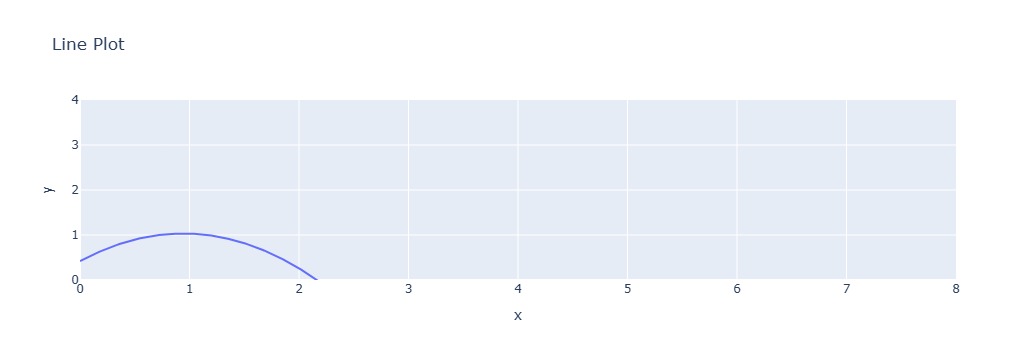

In [16]:
import numpy as np
import plotly.express as px


# Change this code into the correct Line Plot

xs = np.arange(0, 2.5, 0.01)
ys = -0.69 * xs ** 2 + 1.3 * xs + 0.42


fig = px.line(x=xs, y=ys, title="Line Plot")
fig.update_layout(xaxis_range=[0,8], yaxis_range=[0,4])
fig.show()

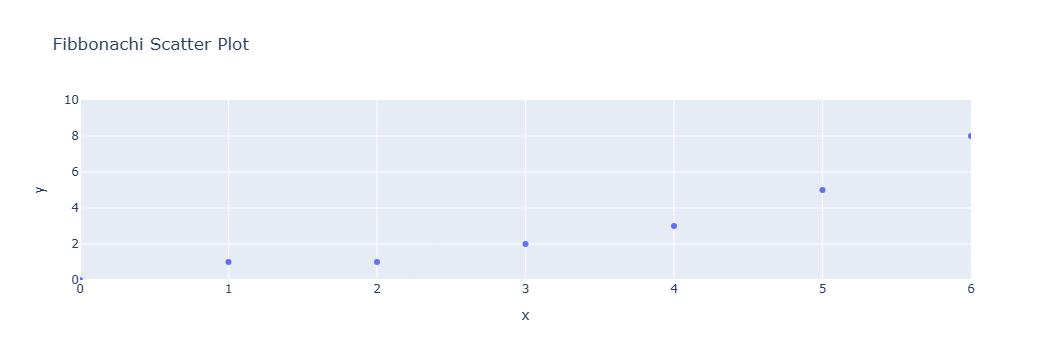

In [19]:
# Change this code into the correct Scatter Plot (please take care of the axis)

ys = [0,1]

for i in range (23):
    ys.append(ys[-1] + ys[-2])
    xs = list(range(len(ys)))
  

fig = px.scatter(x=xs, y=ys, title="Fibbonachi Scatter Plot")
fig.update_layout(xaxis_range=[0,6], yaxis_range=[0,10])
fig.show()

# Task 2 -- Numpy and curve fitting

Fill in the function get_2polynomal_from_3_points(). You are required to use the  
function: np.linalg.solve() for the actual computation, i.e. the task is mainly   
about shaping the input so it fits the np.linalg.solve() function. Note: dont use polyfit().

The function should return a 1d numpy array, with shape = (3,) in the format a, b,c.  
Such that ax^2 + bx + c = y, goes through the points p0, p1, p2

HINT: How should a matrix equation be formed, so solving it gives us the coefficients for a polynomial?

Limitations:
* There should be NO loops or ifs! (for/while/if). 
* Numpy functions that might come handy: reshape, hstack, flatten, ones



In [2]:
import numpy as np

def get_2polynomal_from_3_points(p0: np.array, p1: np.array, p2: np.array) -> np.array:
    # -- CODE --

    points = (point0, point1, point2)
    points = np.vstack(points)
    
    x = points[:,0]
    y = points[:,1]

    A = np.column_stack([x**2, x, np.ones_like(x)])

    coeffs = np.linalg.solve(A, y)
    return coeffs

    
point0 = np.array([0.147, 0.596])
point1 = np.array([0.7, 0.992])
point2 = np.array([2.06, 0.17])


polynomial_coefficients = get_2polynomal_from_3_points(point0, point1, point2)


assert(polynomial_coefficients.shape[0] == 3 and polynomial_coefficients.ndim == 1)

print("Polynomial: {:2f}x^2 + {:.2f}x + {:.2f}".format(*polynomial_coefficients))


if not np.isclose(polynomial_coefficients[0], -0.69, atol=0.01):
    print("x^2 coeff is wrong (a), should be close to -0.69")
    
if not np.isclose(polynomial_coefficients[1], 1.3, atol=0.01):
    print("x coeff is wrong (b), should be close to 1.3")
    
if not np.isclose(polynomial_coefficients[2], 0.42, atol=0.01):
    print("Constant factor (c) is wrong, should be close to 0.42")
    
if np.isclose(polynomial_coefficients, [-0.69, 1.3, 0.42], atol=0.01).all():
    print("Correct polynomial found.")

Polynomial: -0.690280x^2 + 1.30x + 0.42
Correct polynomial found.


# Task 3 -- Simple random search

Find the triplet $a,b,c \in \{x \;|\; x \in \mathbb{Z} \text{ and } 450 > x > 0 \}$ 

Using a random search in the parameter space. Such that the following relations is satisfied: 

### a
$a = \begin{cases} c+11, & \text{if } b\text{ is even} \\ 2c-129, & \text{if } b\text{ is odd} \end{cases}$

### b
$b = (a \times c) \mod 2377$

### c
$c = \left( \sum\limits_{k=0}^{a-1} b - 7k \right) + 142$

**Also how many guesses were needed?**

Note that in math notation $\sum\limits_{k=1}^{5}k = 1+2+3+4+5$ 

Hint (to check if you got the right answer): The product $abc$ should be 255450 $\pm$ 20 
    
Can you find any optimizations besides multi-thread/multi-process?

# Task 4 -- Revisit the Fortuna Algorithm

Below is a implementation of Fortuna that uses fits linear function $f_{\theta} = a x + b$ where $\theta = \{a,b\}$ to a function $g(x)$.  
However, as is evidently from the graph, $g(x)$ is not a linear function.  

1) Change the code to instead use $f_{\theta}(x) = \sum\limits_{k=1}^{3} \Psi_k \sin(\gamma_k (x + \omega_k)) $.  
  Such that $|\theta| = 9$, where each parameter $c$ in $\theta$ is in $[-4. 4]$.  
That is, $f_{\theta}(x)$ is a sum of three sin terms. **Do not change the range of the sample\_theta function.**

3) However, it seems Fortuna (on average) struggles to find the optimal parameters $\theta$.  
Therefore you will have to innovate and change the Fortuna algorithm so that it faster finds "better solutions".
What changes did you make and **why** did you make them, and how did you measure how efficient these changes were?  
A excellent solution here will have an expected best loss of less than 5 using 100000 guesses. (take the average over 100 runs).
**But ANY improvment is sufficient to pass!**  

4) Using your newly made modified Fortuna Algorithm optimize the function: $h(x) = \mu - (\zeta sin(\kappa x) )  (\tau (x + \lambda))$ .  
The y values for this function can be found in the numpy array ys_h_1 (in the code below).  
Also test the values for ys_h_2. (the x is the same for all functions).

Does your new and improved Fortuna outperform the regular fortuna on this function as well? Why?   
**Remember to change your model to match $h(x)$**


4) [**Optional**] Develop a multiprocces implemention of the Fortuna algorithm using python's multiprocessing library (https://docs.python.org/3/library/multiprocessing.html).  
How are the speed ups? Are Fortuna really suited to parallel execution?




100%|█████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 42577.39it/s]

best loss: 37.62006355921043
theta: [-1.0449792  -3.68944798  2.452205   -2.20718994 -0.96633761  2.10262101
 -1.12618573 -0.4244562   2.83281213]


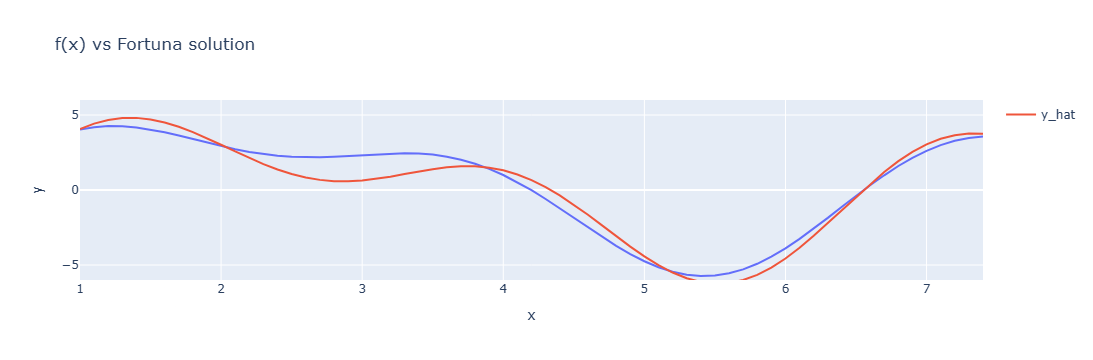

CPU times: total: 2.44 s
Wall time: 2.38 s


In [29]:
%%time
# the magic %%time has to be the first line in the cell, and reports the total exec time of the cell.

import random
import numpy as np
import plotly.express as px
import tqdm


def predict_f3(x, theta):
    # change to sum of 3 sin() terms. 
    # use np.sin() and not math.sin().

    # Task 4.1
    A1, A2, A3, g1, g2, g3, w1, w2, w3 = theta
    return (
        A1 * np.sin(g1 * (x + w1)) + A2 * np.sin(g2 * (x + w2)) + A3 * np.sin(g3 * (x + w3))
    )

def predict_h(x, theta):
    # Task 4.3
    my, zeta, kappa, a, b, lamda = theta
    tau = a * (x + lamda) + b
    return my - (zeta * np.sin(kappa * x)) * tau

    
def sample_theta(size_of_theta):
    # Do NOT CHANGE.
    theta = np.random.uniform(-4, 4, size=size_of_theta)
    return theta


def get_loss(y_hat, ys):
    # No change needed, returns quadratic loss.
    loss = ((y_hat - ys)**2).sum()
    return loss


def fortuna_original(xs, ys, n_params, predict_fn, iters=100000):
# change to the size of theta ( 9 ) (for h(x) how many parameters does it have?)

    best_theta = sample_theta(n_params)
    best_loss = get_loss(predict_fn(xs, best_theta), ys)
    
    for _ in tqdm.tqdm(range(iters)):
        curr_theta = sample_theta(n_params)
        y_hat = predict_fn(xs, curr_theta)
        curr_loss = get_loss(y_hat, ys)

        if best_loss > curr_loss:
            best_loss = curr_loss
            best_theta = curr_theta

    return best_theta, best_loss


def fortuna_improved(xs, ys, n_params, predict_fn, total=100000, batch=10):

    iters = total // batch

    best_theta = sample_theta(n_params)
    best_loss = get_loss(predict_fn(xs, best_theta), ys)
    

    for _ in tqdm.tqdm(range(iters)): 

        candidates = np.random.uniform( -4, 4, size= (batch, n_params))

        for curr_theta in candidates:
            y_hat = predict_fn(xs, curr_theta)
            curr_loss = get_loss(y_hat, ys)
        
            if curr_loss < best_loss:
                best_loss = curr_loss
                best_theta = curr_theta

    return best_theta, best_loss


# Data
xs = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4])
ys = np.array([4.03, 4.19, 4.26, 4.25, 4.17, 4.03, 3.85, 3.63, 3.40, 3.16, 2.93, 2.72, 2.53, 2.39, 2.28, 2.21, 2.18, 2.19, 2.22, 2.27, 2.33, 2.39, 2.44, 2.45, 2.43, 2.36, 2.22, 2.02, 1.75, 1.41, 1.00, 0.52, -0.01, -0.60, -1.22, -1.86, -2.50, -3.13, -3.72, -4.27, -4.75, -5.15, -5.45, -5.65, -5.74, -5.70, -5.55, -5.29, -4.92, -4.44, -3.89, -3.26, -2.58, -1.86, -1.12, -0.39, 0.32, 0.98, 1.60, 2.14, 2.61, 2.99, 3.28, 3.47, 3.57])

# 
ys_h_1 = np.array([15.98, 21.42, 24.1, 23.87, 21.0, 16.11, 10.06, 3.79, -1.8, -6.01, -8.39, -8.82, -7.47, -4.77, -1.3, 2.31, 5.49, 7.81, 9.04, 9.18, 8.44, 7.15, 5.72, 4.54, 3.89, 3.9, 4.52, 5.54, 6.63, 7.39, 7.49, 6.7, 4.97, 2.44, -0.54, -3.48, -5.8, -6.98, -6.61, -4.51, -0.79, 4.2, 9.8, 15.21, 19.57, 22.09, 22.2, 19.63, 14.52, 7.41, -0.83, -9.07, -16.11, -20.83, -22.36, -20.27, -14.59, -5.91, 4.72, 15.9, 26.06, 33.69, 37.58, 36.94, 31.64])
ys_h_2 = np.array([[5.87, 5.83, 5.74, 5.62, 5.48, 16.58, 18.21, 18.49, 17.54, 15.54, 4.15, 3.9, 3.65, 3.42, 3.2, -1.9, -3.32, -3.97, -3.91, -3.27, 2.38, 2.36, 2.39, 2.46, 2.57, 2.2, 1.93, 1.22, 0.17, -1.06, 4.18, 4.59, 5.04, 5.52, 6.02, -1.49, 0.74, 3.55, 6.75, 10.06, 9.39, 9.95, 10.5, 11.02, 11.52, 16.0, 12.82, 8.47, 3.21, -2.62, 13.61, 13.76, 13.84, 13.84, 13.77, -24.16, -22.03, -17.9, -11.95, -4.55, 11.63, 10.99, 10.27, 9.47, 8.61]])

def main():
    
    # Option A: 3 Sine model
    predict_fn = predict_f3
    n_params = 9
    target = ys
        
    """
    # Option B: h(x) vs ys_h_1
    predict_fn = predict_h
    n_params = 6
    target = ys_h_1
    """
    
    """
    # Option C: h(x) vs ys_h_2
    predict_fn = predict_h
    n_params = 6
    target = ys_h_2.flatten()
    """
    
    # Choose Fortuna algorithme

    best_theta, best_loss = fortuna_original(xs, target, n_params, predict_fn)

    #best_theta, best_loss = fortuna_improved(xs, target, n_params, predict_fn)
    
    print("best loss:", best_loss)
    print("theta:", best_theta)    
    
    
    fig = px.line(x=xs, y=target, title="f(x) vs Fortuna solution")
    fig.add_scatter(x=xs, y=predict_fn(xs, best_theta), mode='lines', name="y_hat")
    fig.update_layout(xaxis_range=[xs.min(),xs.max()], yaxis_range=[-6,6])
    fig.show()

main()
    
# to get a solid estimate -> you should train at least 100 models and take the average performance.

Changed the program a bit, as mainly an C/C++ developer i find code when it runs in main so much easier to read. Working with a main fucntion is familiar. The orignal fortuna algorithm is still the same, but there were a few modifications for it to better fit in a function. 

The improved Fortuna algorithm works by evaluating a batch of 10 candidates at once instead of trying one by one. This increases the probability of finding a better soloution earlier since the best of many is most likely better than the best of one. 

# Task 5 -- Fortuna For Decision Trees

Implement a Decision Tree for solving the XOR problem.   
Here: there are 2 real valued inputs, x0, x1  (found in xs).  

And the DT should take these two as input and predict an output: 0 or 1.   
The true answer can be found in ys_true.


In [36]:
import numpy as np
rng = np.random.default_rng(42)
n_examples = 40

xs = rng.uniform(size=(n_examples, 2))

# make a true y
b = (xs>0.5).astype(int)
ys_true = np.logical_xor(b[:, 0], b[:, 1]).astype(int)



##################################
# here you implement a Decision Tree that is built using the fortuna algorithm.
# The depth of the tree should be less than 4
# The DT should reach 100% accuracy.

def score_tree(xs, ys, t0, t1, t2):

    x0, x1 = xs[:, 0], xs[:, 1]
    preds = np.zeros_like(ys)

    regions = [
        (x0 > t0) & (x1 > t2), 
        (x0 > t0) & (x1 <= t2),
        (x0 <= t0) & (x1 > t1),
        (x0 <= t0) & (x1 <= t1),
    ]

    for mask in regions:
        if mask.any():
            preds[mask] = np.round(ys[mask].mean())

    acc = (preds == ys).mean()
    return acc, preds


def fortuna_dt(xs, ys, iters=10000):
    best_acc = 0.0
    best = None

    for _ in range(iters):
        t0, t1, t2 = np.random.rand(3)
        acc, preds = score_tree(xs, ys, t0, t1, t2)
        
        if acc > best_acc:
            best_acc = acc
            best = (t0, t1, t2, preds)
            if acc == 1.0:
                break
    return best, best_acc

(best_t0, best_t1, best_t2, preds), acc = fortuna_dt(xs, ys_true)

print(f"Best accuracy: {acc * 100:.1f}%")
print("Tresholds:", best_t0, best_t1, best_t2)





Best accuracy: 100.0%
Tresholds: 0.5418654995145764 0.5630137015413839 0.5139932849149482


# Task 6 -- Best Route App

A company called Knut Knut Transport AS is using one of the 4 routes for delivery (see Pitch\_knutknut\_transport.pdf for more info).
* A -> C -> D  
* A -> C -> E  
* B -> C -> D  
* B -> C -> E  

They have discovered that they can transport the goods faster by picking the right route given 
only the depature time of the transport.

In the file "traffic.jsonl" on Canvas is the collected data up to the current point in time.
So far, they have just selected a route at random, now they want to implement a simple web-api
that can help the drivers select the best route. 

* Using the data found in traffic.jsonl, create a ML model that given an time (hour:min) can select the fastest route to travel. **Be sure to document in a google doc/word/notebook/... how YOU created your ML model.** The ML model should be trained using the Fortuna algorithm.

* Download the knut\_knut\_app.py found on canvas an implement the function: get\_the\_best\_route\_as\_a\_text\_informatic(dep\_hour, dep\_min) such that the web application works and gives a good estimated time.

* The CEO (Knut) want you to estimate how much time they can save from using this new app.
* Prepare a VERY short presentation (pdf) on the gains and tech behind the app (random subsample will present for the class)


Some hints:
* Look closely at the data using both numerical analysis and visual (plotting). 
* Use the python library datetime to handle time calculations. 
* Make sure the features are scaled in a way that make sense.
* Once you have a model working, use the python library pickle to save/load the model.